# Wine Quality Data Set
<img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large186.jpg" width = "100"/>

Project Proposal: Grading The Quality of Red Wine

Those who avidly drink wine take pride in understanding the different types and aspects of it and often are quite selective on the certain types of wine they choose to drink. Because the nature of wine can change quite differently depending on its ingredients and the specific way it is brewed, the concern of grading the quality of a type of wine is very important as it ultimately determines how likely someone will consume a certain type of wine. Our project proposal is looking to be able to determine the specific category of wine quality for red wine samples and more specifically, if we are able to accurately grade the wine quality of different samples of red wine based off of their four most relevant ingredients. The parameters we will be using to determine the classification of “wine quality” as defined by Cortez et al. is a continuous integer-based scale with 0 being very bad quality and 10 being excellent quality of wine. To carry out this procedure we decided to use the “Wine Quality Data Set” which shows numerous observations of red wine with 11 columns  attached with a final column being used to show the wine quality score given.

This is a classification process because we are predicting categorical values. Firstly, we will split our dataset into a training and testing set. The variables we will use as predictors will be sulphates, pH, total sulfur dioxide and alcohol. The reason we will be looking at these columns as predictors is accord to their study (Cortez et al), those are the four most relevant factors in determining the quality for red wine. We will be grading the success of our classifier based off its accuracy to correctly predict which category of wine quality each observation of red wine belongs to from our testing set. We’ll use cross validation to get the best estimate of accuracy for our classifier so we can know which parameters work the best. We’ll show a visual representation of this in the form of a line graph, highlighting the different estimate accuracies in relation to the amount of neighbors we use. Finally we’ll use the best parameter to see if our classifier can accurately predict the wine quality based on these 4 predictors. 


We are expecting that that there will be a good chance our classifier isn’t very accurate and this is due to the fact that although the 4 predictors chosen are the 4 most relevant, the remaining variables are still collectively important to effectively predict the quality of red wine.  The findings we have will be impactful as it will give consumers and your average wine connoisseurs a better understanding of what to place higher emphasis on when grading wine quality and ultimately looking for which wine to buy. These findings could potentially lead to questions such as “Is it valid to use objective quantitative data as a means of determining an ultimately subjective classification?”




**Read the dataset from the web**,
<br> randomly select 10 rows to observe the dataframe.

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [3]:
wine_data <- read_csv2("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")
slice_sample(wine_data, n = 10)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (5): volatile acidity, citric acid, chlorides, density, sulphates
dbl (2): total sulfur dioxide, quality

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
78,0.61,0.29,16,0.114,9,29,0.9974,326,1.56,91,5
61,0.58,0.23,25,0.044,16,70,0.99352,346,0.65,125,6
106,0.34,0.49,32,0.078,20,78,0.9992,319,0.7,10,6
82,0.4,0.44,28,0.089,11,43,0.9975,353,0.61,105,6
6,0.64,0.05,19,0.066,9,17,0.99496,352,0.78,106,5
62,0.63,0.31,17,0.088,15,64,0.9969,346,0.79,93,5
77,0.41,0.76,18,0.611,8,45,0.9968,306,1.26,94,5
86,0.55,0.09,33,0.068,8,17,0.99735,323,0.44,10,5
109,0.32,0.52,18,0.132,17,44,0.99734,328,0.77,115,6


**In our dataset, we can see there are only 2 rows that have missing data. We then choose to remove these incomplete cases from the dataframe using `na.omit`.**

In [11]:
wine_data[!complete.cases(wine_data),]
wine_data <- na.omit(wine_data)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
66,0.63,0,43,0.093,51,NA,0.99558,32,0.45,95,5
66,0.63,0,43,0.093,51,NA,0.99558,32,0.45,95,5


**In addition, we use `make.names` to replace column names that contain empty spaces with a `.`. This will allow us use our tidyverse functions more conveniently.**

In [12]:
colnames(wine_data) <- make.names(colnames(wine_data))
slice(wine_data, 1)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
74,0.7,0,19,0.076,11,34,0.9978,351,0.56,94,5


**We then used `mutate` to convert all predictors into numeric data; convert target variable to a factor using `as_factor`.**

In [13]:
wine_data <- wine_data |> 
  mutate(across(fixed.acidity:alcohol, as.numeric)) |>
  mutate(quality = as_factor(quality))

slice(wine_data, 1)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
74,0.7,0,19,0.076,11,34,0.9978,351,0.56,94,5


**After tidying our data to a format that is suitable for analysis, we continue to next step by 
focusing specifically on the training data.**
<br> We choose to split 75% of our original data set into the training set.

In [14]:
wine_split <- initial_split(wine_data, prop = 0.75, strata = quality)  
wine_train <- training(wine_split)   
wine_test <- testing(wine_split)

**Since all of the predictor variables contains quantitaive data, we found the mean of each column using `summarize` + `across`.**

In [16]:
wine_train_avg <- wine_train |> 
  summarize(across(fixed.acidity:alcohol, mean))

wine_train_avg

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
75.02757,0.5296491,0.2715539,26.72013,0.08636591,16.87803,46.28655,0.996762,296.6124,0.6577193,1.088833e+12


**Next, we use `group_by` + `summarize` to find out the distribution of each of our target variable (quality).**

In [18]:
target <- wine_train |>
    group_by(quality) |>
    summarize(n=n())
target

quality,n
<fct>,<int>
3,9
4,43
5,504
6,477
7,149
8,15


To better

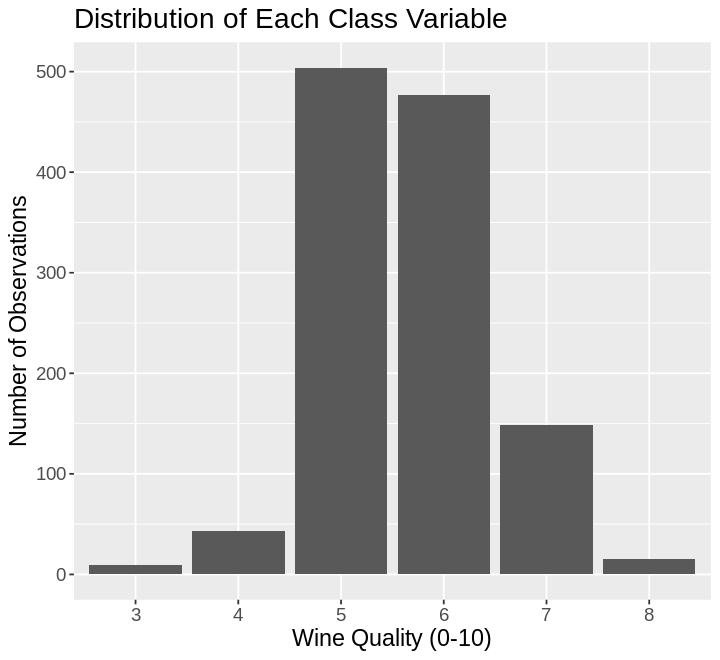

In [37]:
options(repr.plot.width = 6, repr.plot.height = 5.5)

plot <- ggplot(target, aes(x = quality, y = n)) +
  geom_bar(stat = "identity") +
  labs(x = "Wine Quality (0-10)", y = "Number of Observations") +
  ggtitle("Distribution of Each Class Variable") +
  theme(text = element_text(size = 14))
plot


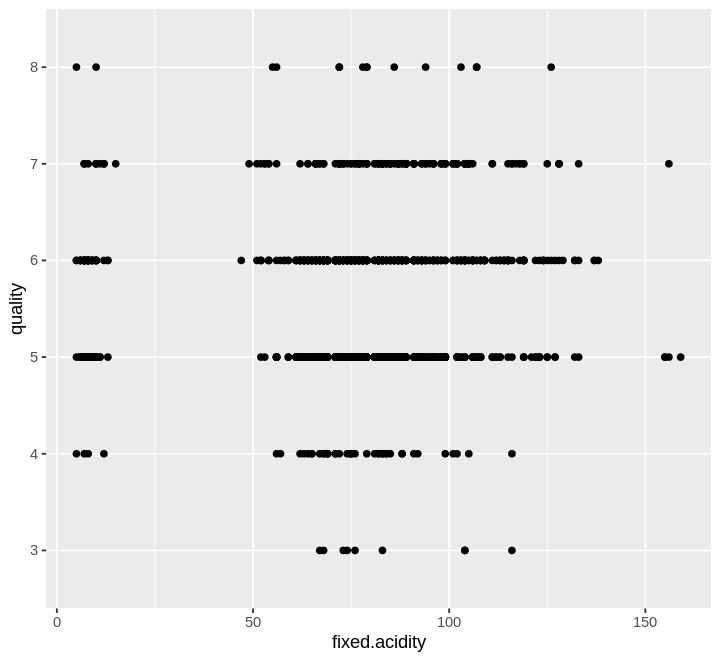

In [55]:
graph <- ggplot(wine_train, aes(x = fixed.acidity, y =quality)) +
geom_point() 
graph

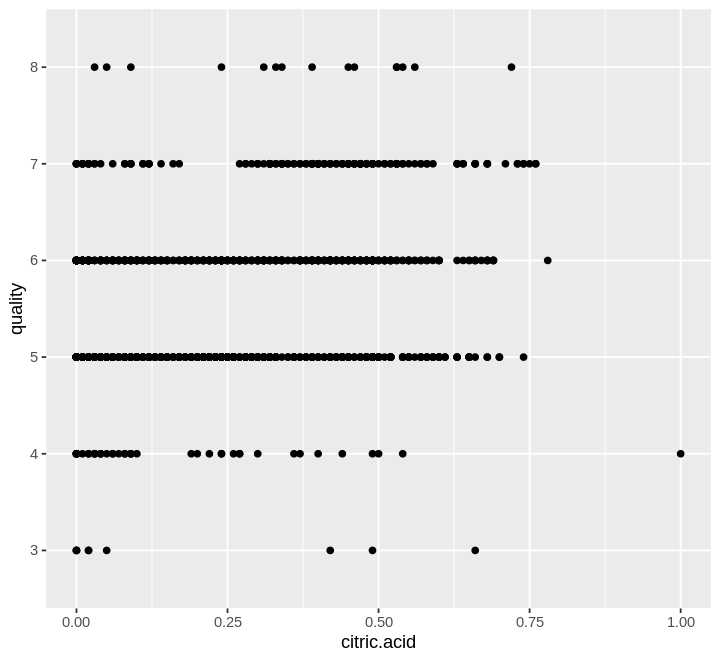

In [56]:
graph2 <- ggplot(wine_train, aes(x = citric.acid, y =quality)) +
geom_point()

graph2

Study the dataset comes from -
Modeling wine preferences by data mining from physicochemical properties - Paulo Cortez, António Cerdeir, Fernando Almeida, Telmo Matos, José Reis
https://www.sciencedirect.com/science/article/pii/S0167923609001377?via%3Dihub 